In [52]:
import pandas as pd
import pandas_datareader as pdr
import urllib.request as ur
import numpy as np
from numpy import savetxt
import seaborn
import statsmodels
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from pandas import datetime

C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if sys.path[0] == '':


In [38]:
master_data=pd.read_csv('C:\\Users\\PC\\Desktop\\Thesis\\database\\thesis_data\\master_data_cleaned.csv',index_col='Date')
master_data.index=pd.to_datetime(master_data.index)

In [39]:
#coint pair search
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

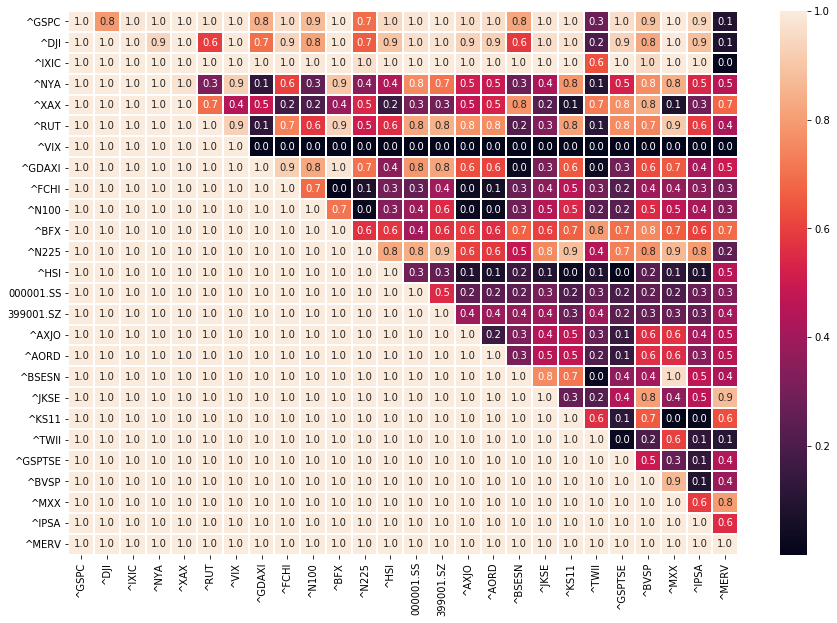

[('^IXIC', '^MERV'), ('^VIX', '^GDAXI'), ('^VIX', '^FCHI'), ('^VIX', '^N100'), ('^VIX', '^BFX'), ('^VIX', '^N225'), ('^VIX', '^HSI'), ('^VIX', '000001.SS'), ('^VIX', '399001.SZ'), ('^VIX', '^AXJO'), ('^VIX', '^AORD'), ('^VIX', '^BSESN'), ('^VIX', '^JKSE'), ('^VIX', '^KS11'), ('^VIX', '^TWII'), ('^VIX', '^GSPTSE'), ('^VIX', '^BVSP'), ('^VIX', '^MXX'), ('^VIX', '^IPSA'), ('^VIX', '^MERV'), ('^GDAXI', '^BSESN'), ('^GDAXI', '^TWII'), ('^FCHI', '^BFX'), ('^FCHI', '^AXJO'), ('^N100', '^N225'), ('^N100', '^AXJO'), ('^N100', '^AORD'), ('^HSI', '^KS11'), ('^HSI', '^GSPTSE'), ('^BSESN', '^TWII'), ('^KS11', '^MXX'), ('^KS11', '^IPSA'), ('^TWII', '^GSPTSE')]


In [4]:
cores, pvalues, pairs = find_cointegrated_pairs(master_data)
m = [0,0.2,0.4,0.6,0.8,1]

fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches #,mask = (pvalues >= 0.98)
seaborn.heatmap(pvalues, xticklabels=master_data.columns, yticklabels=master_data.columns,annot=True, 
                fmt='.1f', linewidths=1, ax=ax)
plt.show()
print(pairs)

P-value of ^GDAXI and ^BSESN: 0.027947142390145674


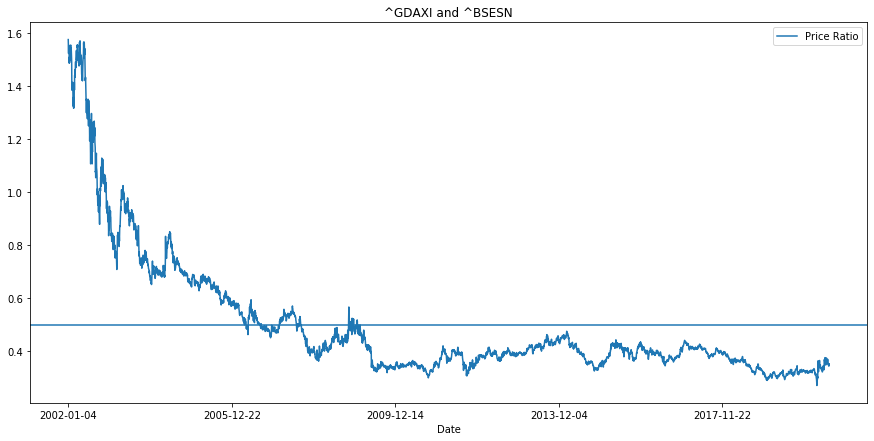

P-value of ^GDAXI and ^TWII: 0.033404861972616114


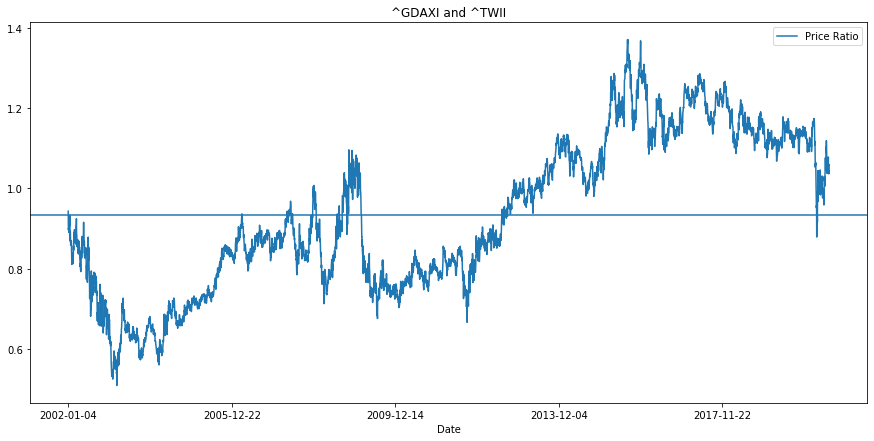

P-value of ^FCHI and ^BFX: 0.005339687398320651


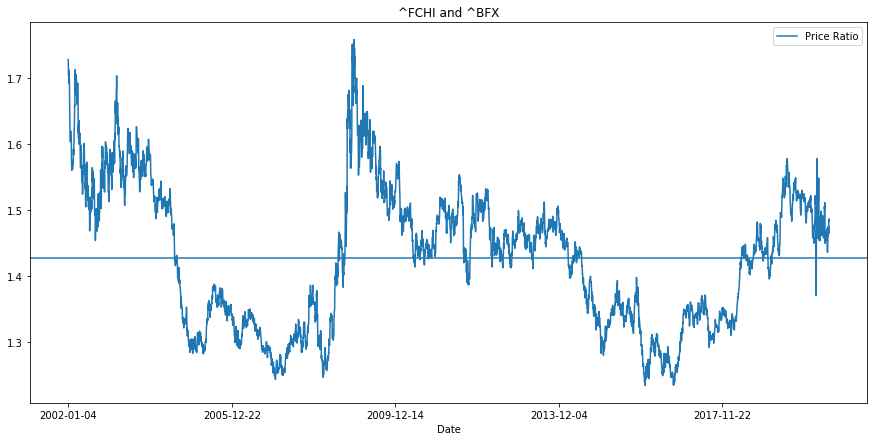

P-value of ^FCHI and ^AXJO: 0.0381735890924039


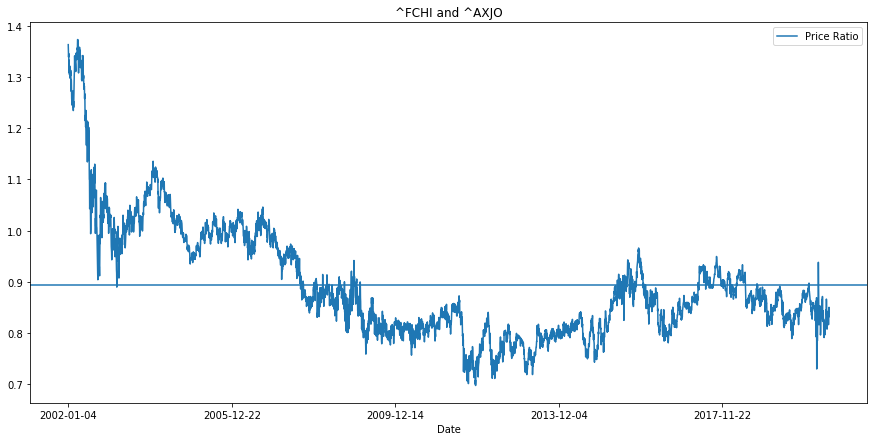

P-value of ^N100 and ^N225: 0.02468367256242098


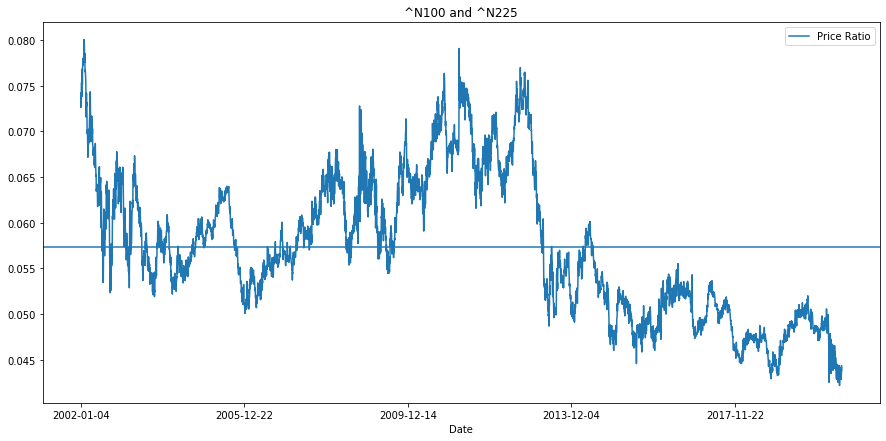

P-value of ^N100 and ^AXJO: 0.025460469623918118


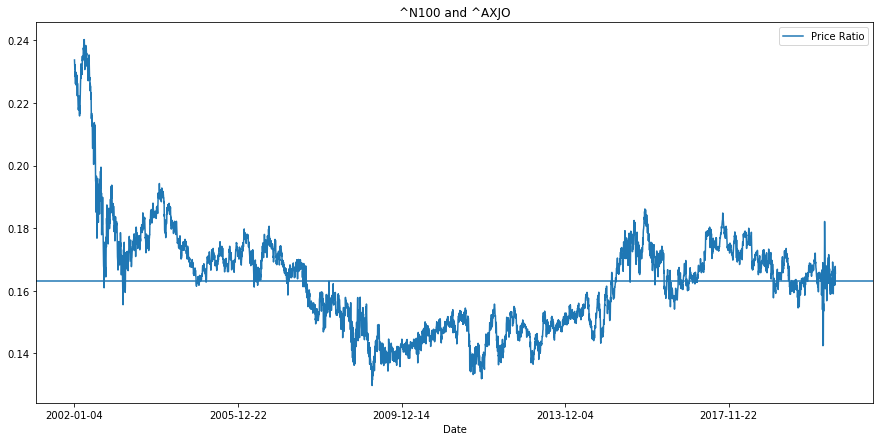

P-value of ^N100 and ^AORD: 0.02791129597798717


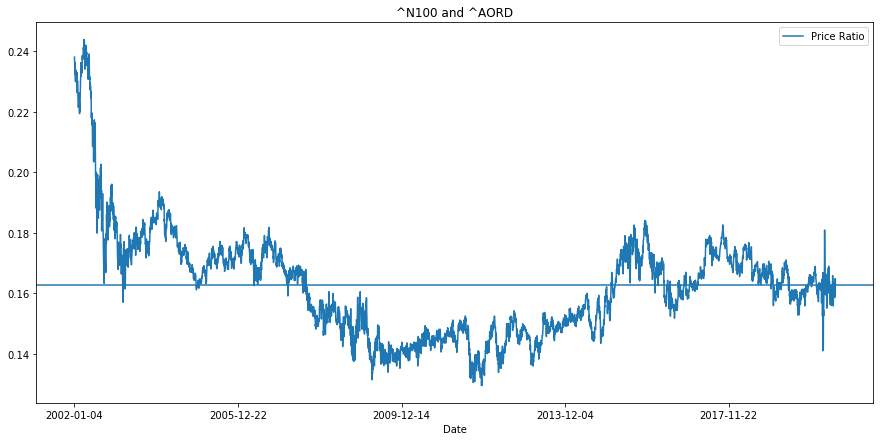

P-value of ^HSI and ^KS11: 0.027452121532171907


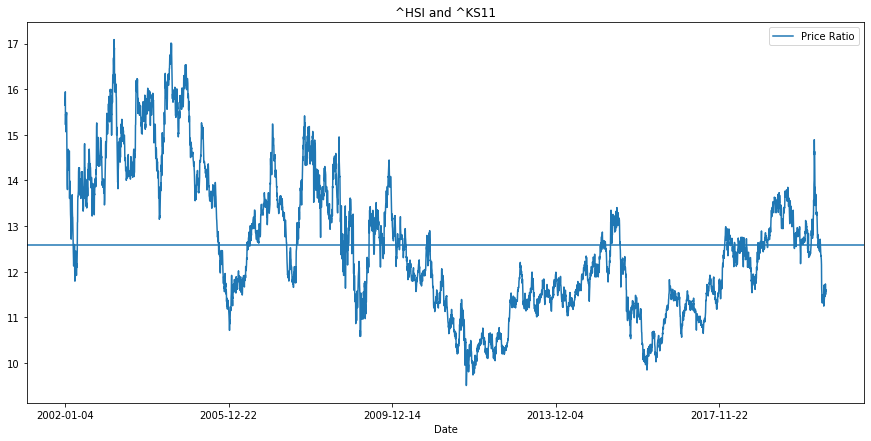

P-value of ^HSI and ^GSPTSE: 0.006458556382781373


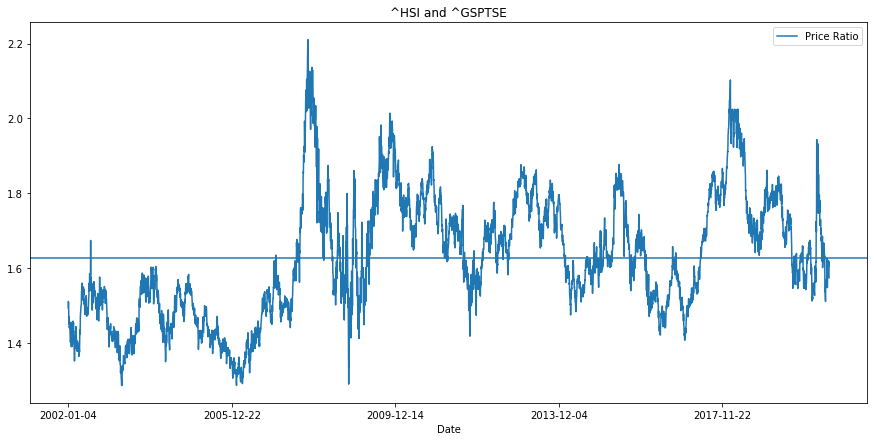

P-value of ^BSESN and ^TWII: 0.025230462185143392


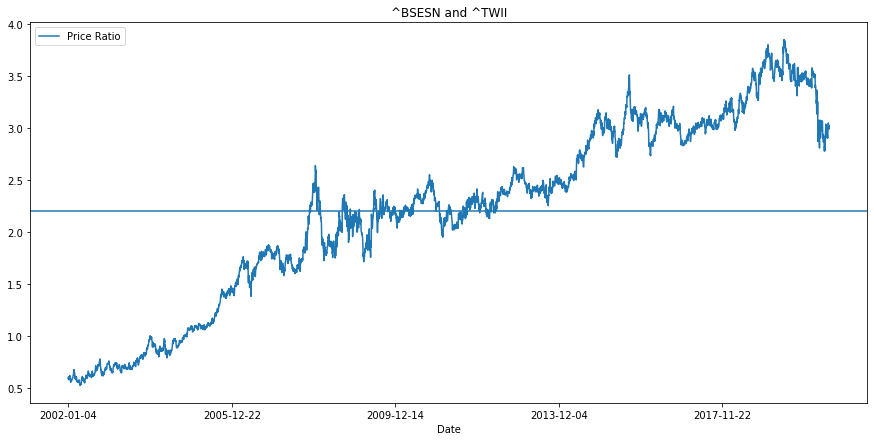

P-value of ^KS11 and ^MXX: 0.004015563350677884


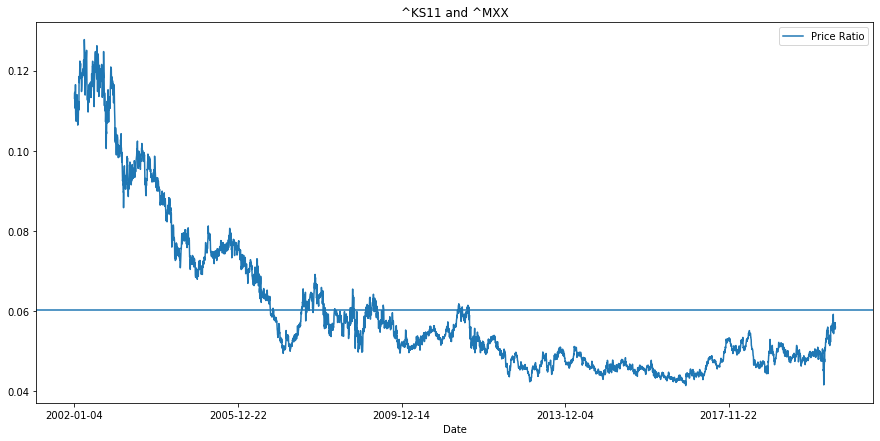

P-value of ^KS11 and ^IPSA: 0.015360270748289297


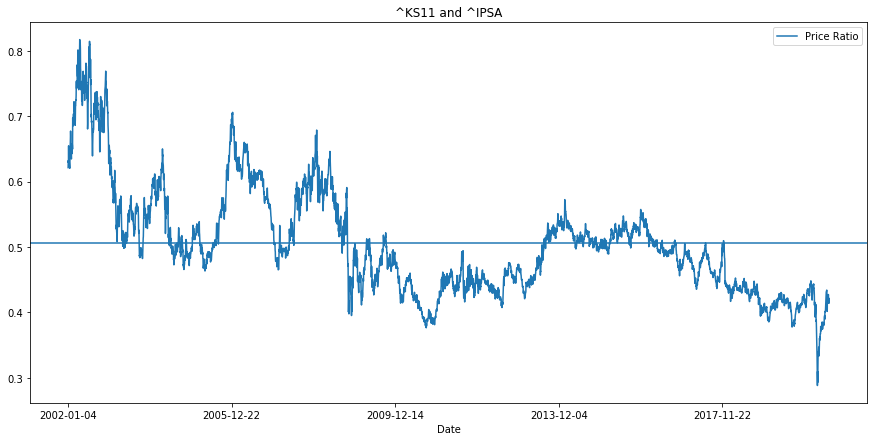

P-value of ^TWII and ^GSPTSE: 0.026995652336526513


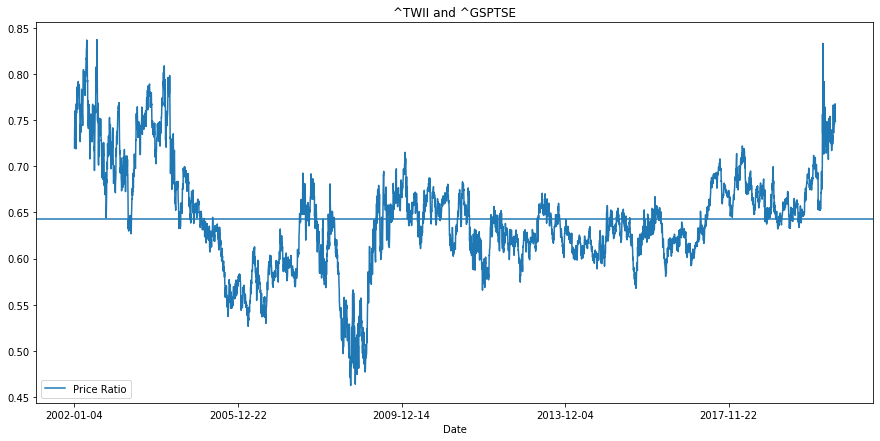

In [5]:
#analyzing to find the right pair
coint_pairs=[('^GDAXI', '^BSESN'), ('^GDAXI', '^TWII'), ('^FCHI', '^BFX'), ('^FCHI', '^AXJO'), ('^N100', '^N225'), ('^N100', '^AXJO'), ('^N100', '^AORD'), ('^HSI', '^KS11'), ('^HSI', '^GSPTSE'), ('^BSESN', '^TWII'), ('^KS11', '^MXX'), ('^KS11', '^IPSA'), ('^TWII', '^GSPTSE')]
for pairs in coint_pairs:
    S1 = master_data[pairs[0]]
    S2 = master_data[pairs[1]]
    score, pvalue, _ = coint(S1, S2)
    print('P-value of {pair} and {pair2}: {value}'.format(pair=pairs[0],pair2=pairs[1],value=pvalue))
    ratios = S1 / S2
    ratios.plot(figsize=(15,7))
    plt.axhline(ratios.mean())
    plt.legend(['Price Ratio'])
    plt.title('{pair} and {pair2}'.format(pair=pairs[0],pair2=pairs[1]))
    plt.show()    

In [7]:
big_diff=[('^GDAXI', '^BSESN'),('^BSESN', '^TWII'),('^KS11', '^MXX')]
coint_pairs=[('^GDAXI', '^TWII'), ('^FCHI', '^BFX'), ('^FCHI', '^AXJO'), ('^N100', '^N225'), ('^N100', '^AXJO'), ('^N100', '^AORD'), ('^HSI', '^KS11'), ('^HSI', '^GSPTSE'), ('^KS11', '^IPSA'), ('^TWII', '^GSPTSE')]

In [8]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

P-value of ^GDAXI and ^TWII: 0.033404861972616114


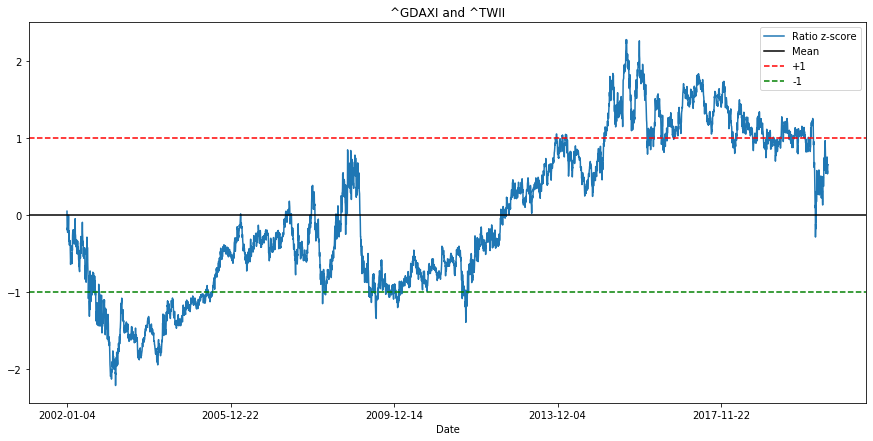

P-value of ^FCHI and ^BFX: 0.005339687398320651


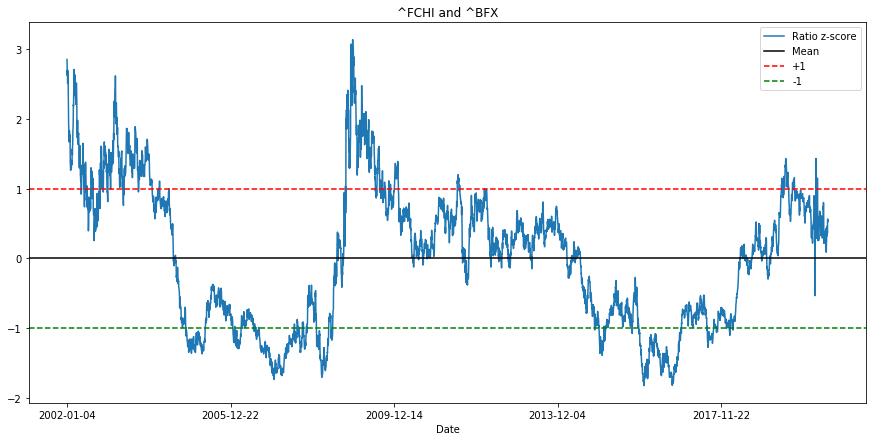

P-value of ^FCHI and ^AXJO: 0.0381735890924039


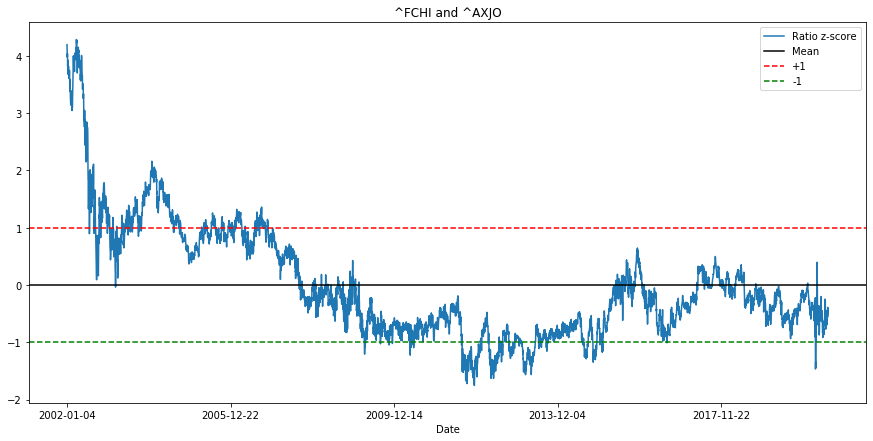

P-value of ^N100 and ^N225: 0.02468367256242098


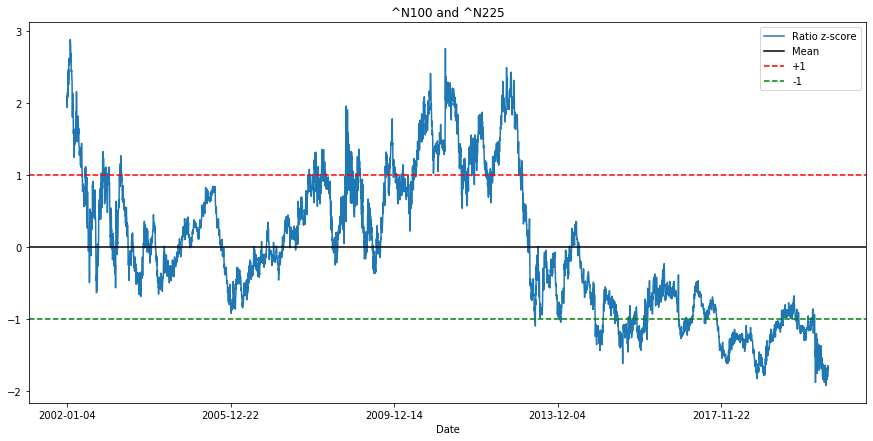

P-value of ^N100 and ^AXJO: 0.025460469623918118


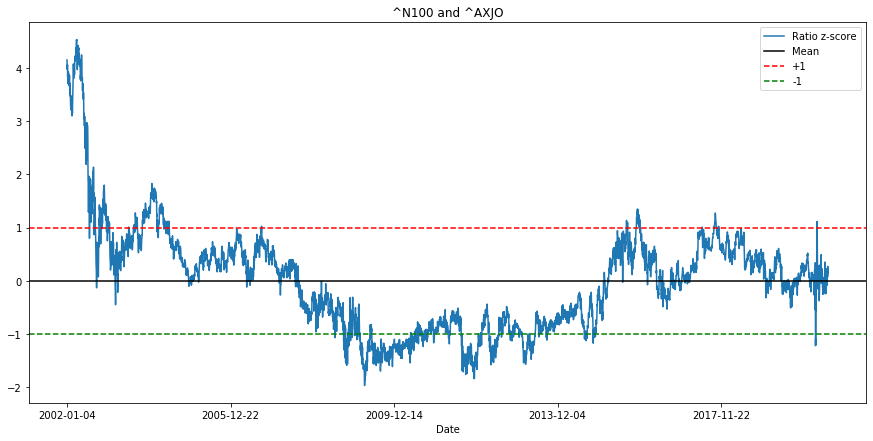

P-value of ^N100 and ^AORD: 0.02791129597798717


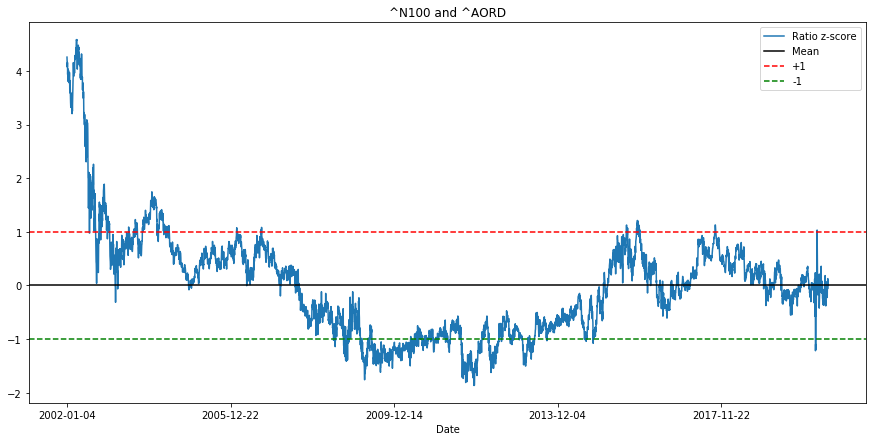

P-value of ^HSI and ^KS11: 0.027452121532171907


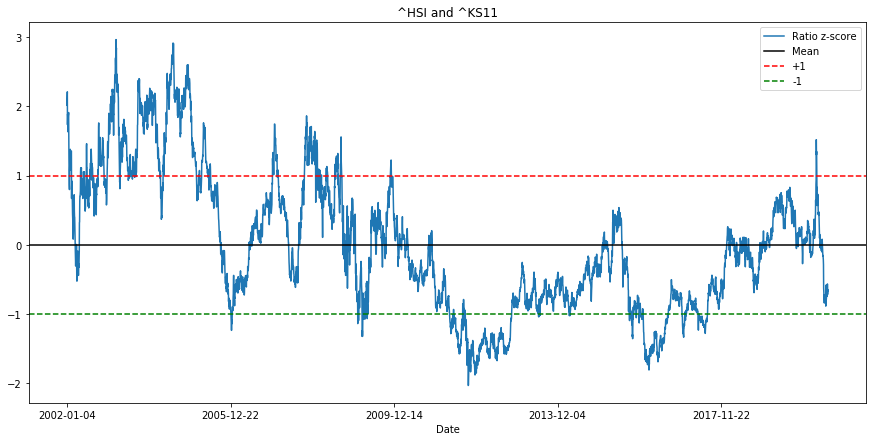

P-value of ^HSI and ^GSPTSE: 0.006458556382781373


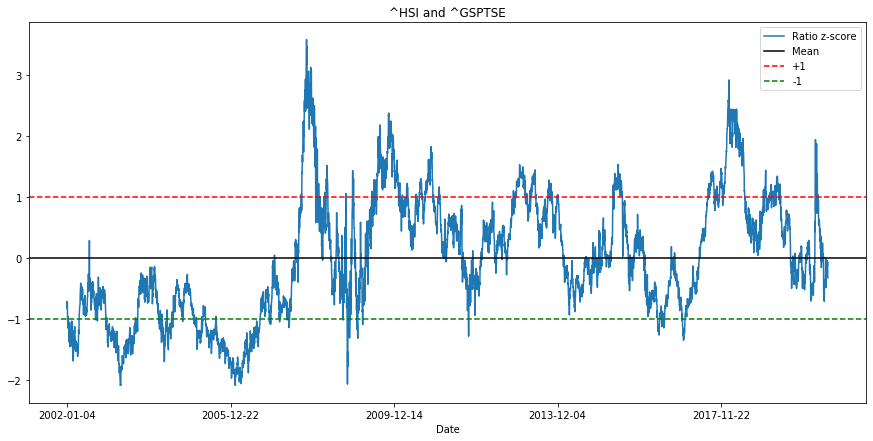

P-value of ^KS11 and ^IPSA: 0.015360270748289297


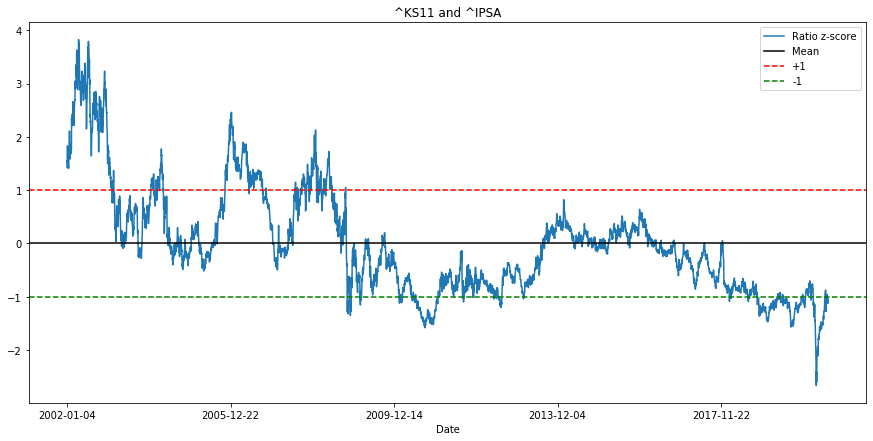

P-value of ^TWII and ^GSPTSE: 0.026995652336526513


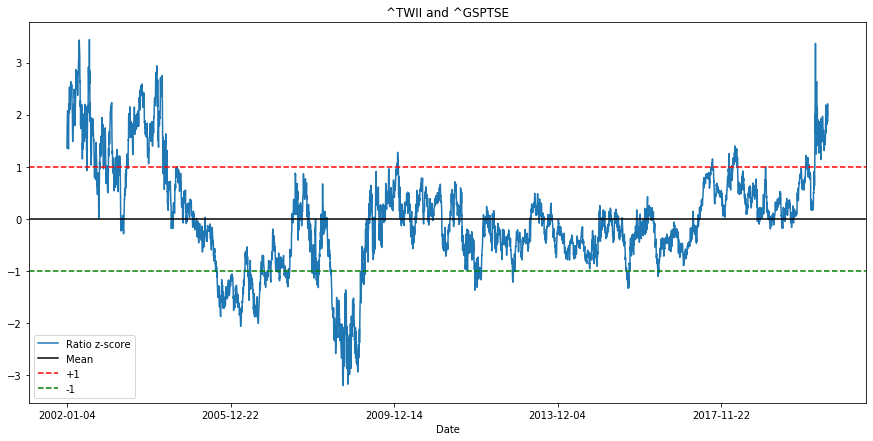

In [9]:
for pairs in coint_pairs:
    S1 = master_data[pairs[0]]
    S2 = master_data[pairs[1]]
    score, pvalue, _ = coint(S1, S2)
    print('P-value of {pair} and {pair2}: {value}'.format(pair=pairs[0],pair2=pairs[1],value=pvalue))
    ratios = S1 / S2
    zscore(ratios).plot(figsize=(15,7))
    plt.axhline(zscore(ratios).mean(), color='black')
    plt.axhline(1.0, color='red', linestyle='--')
    plt.axhline(-1.0, color='green', linestyle='--')
    plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
    plt.title('{pair} and {pair2}'.format(pair=pairs[0],pair2=pairs[1]))
    plt.show()

In [40]:
#^HSI and ^GSPTSE: 0.006458556382781373
ratios=master_data['^HSI']/master_data['^GSPTSE']
train = ratios[:2791]
test = ratios[2791:]

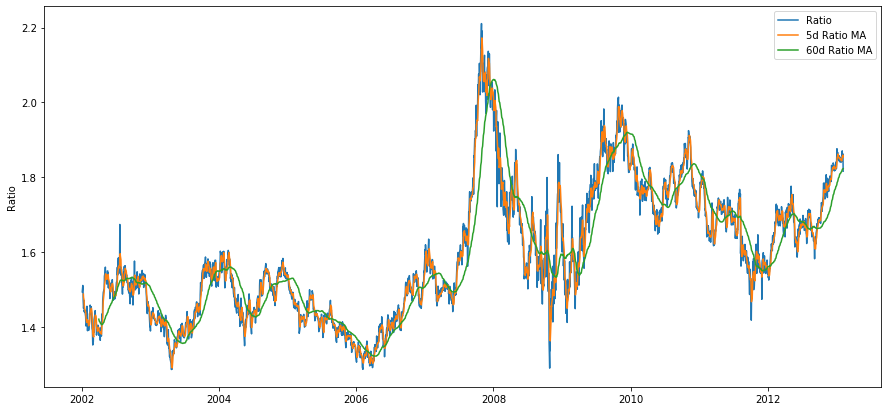

In [34]:
ratios_mavg5 = train.rolling(window=5,
                               center=False).mean()

ratios_mavg60 = train.rolling(window=60,
                               center=False).mean()

std_60 = train.rolling(window=60,
                        center=False).std()

zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60

plt.figure(figsize=(15,7))
plt.plot(train.index,train.values)
plt.plot(ratios_mavg5.index,ratios_mavg5.values)
plt.plot (ratios_mavg60.index,ratios_mavg60.values)

plt.legend(['Ratio','5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

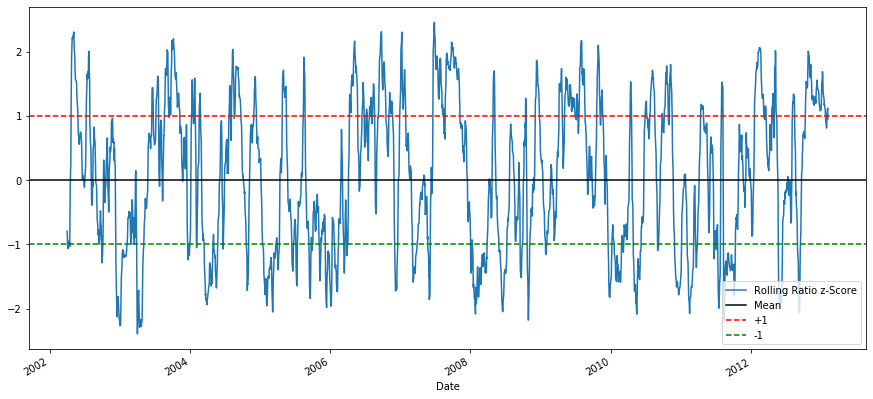

In [35]:
# Take a rolling 60 day standard deviation
std_60 = train.rolling(window=60,center=False).std()
std_60.name = 'std 60d'

# Compute the z score for each day
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
zscore_60_5.name = 'z-score'

plt.figure(figsize=(15,7))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

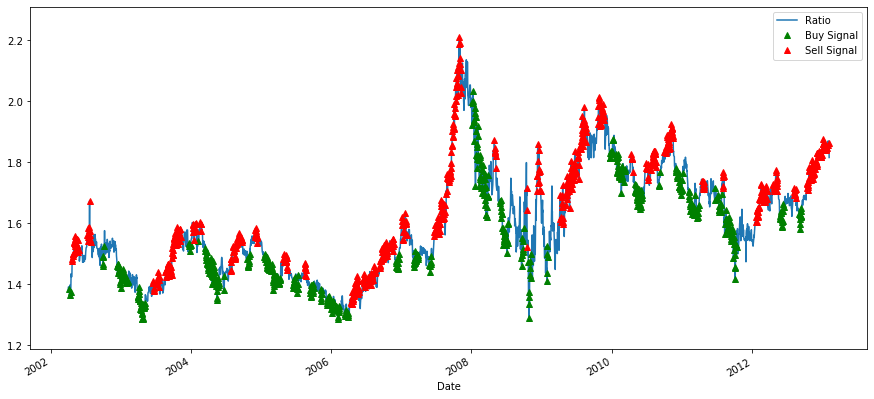

In [36]:
# Plot the ratios and buy and sell signals from z score
plt.figure(figsize=(15,7))

train[60:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min()-0.1,ratios.max()+0.1))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

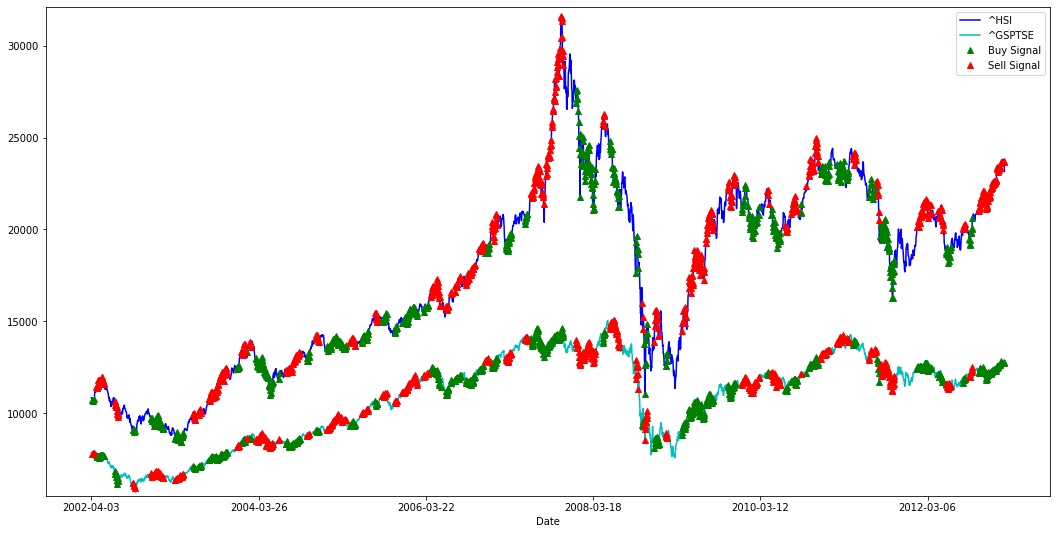

In [18]:
# Plot the prices and buy and sell signals from z score
#^HSI and ^GSPTSE: 0.006458556382781373
plt.figure(figsize=(18,9))
S1 = master_data['^HSI'].iloc[:2791]
S2 = master_data['^GSPTSE'].iloc[:2791]

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min()-200,S2.min()-200),max(S1.max()+500,S2.max()+500)))

plt.legend(['^HSI','^GSPTSE', 'Buy Signal', 'Sell Signal'])
plt.show()

In [42]:

def trade(S1, S2, window1, window2):#file would contain transaction data
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += 0.99*(S1[i] - S2[i] * ratios[i])
            countS1 -= 1
            countS2 += ratios[i]
        # Buy long if the z-score is < 1
        elif zscore[i] < -1:
            money -= 1.01*(S1[i] - S2[i] * ratios[i])
            countS1 += 1
            countS2 -= ratios[i]
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.5:
            money += 0.99*(countS1*S1[i] + S2[i] * countS2)
            countS1 = 0
            countS2 = 0
       
        
    return money


trade(master_data['^HSI'].iloc[:2791], master_data['^GSPTSE'].iloc[:2791], 5, 60)

171154.69726417348

In [43]:
#test set result
trade(master_data['^HSI'].iloc[2791:], master_data['^GSPTSE'].iloc[2791:], 5, 60)

6158.796113487086

In [44]:
# Find the window length 0-254 
# that gives the highest returns using this strategy
length_scores = [trade(master_data['^HSI'].iloc[:2791], 
                master_data['^GSPTSE'].iloc[:2791], 5, l) 
                for l in range(255)]
best_length = np.argmax(length_scores)
print ('Best window length:', best_length)
print(length_scores[best_length])

Best window length: 193
955334.0817427462


In [46]:
# Find the returns for test data
# using what we think is the best window length
length_scores2 = [trade(master_data['^HSI'].iloc[2791:], 
                master_data['^GSPTSE'].iloc[2791:],5, l) 
                  for l in range(255)]
print (best_length, 'day window:', length_scores[best_length])

# Find the best window length based on this dataset, 
# and the returns using this window length
best_length2 = np.argmax(length_scores2)
print (best_length2, 'day window:', length_scores2[best_length2])

193 day window: 955334.0817427462
177 day window: 707363.553160359


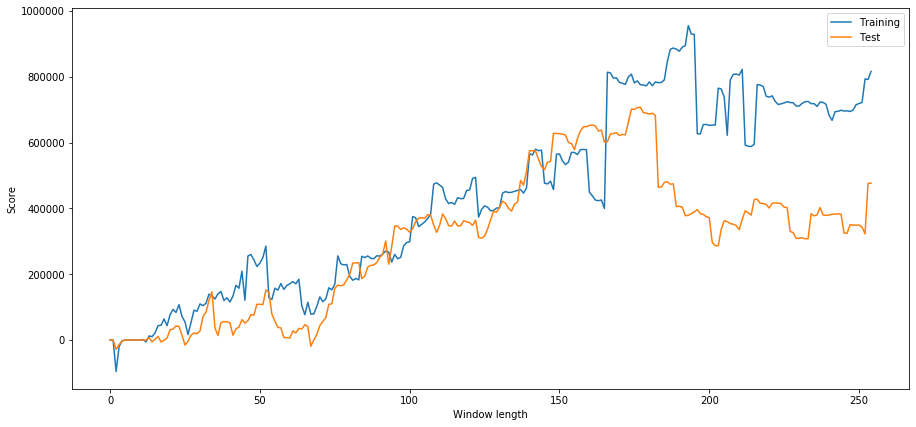

In [47]:
plt.figure(figsize=(15,7))
plt.plot(length_scores)
plt.plot(length_scores2)
plt.xlabel('Window length')
plt.ylabel('Score')
plt.legend(['Training', 'Test'])
plt.show()

In [222]:
#for final selection one, otherwise remove file, pd, export csv
def trade_analysis(S1, S2, window1, window2,file):#file would contain transaction data
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    df = pd.DataFrame(columns=['Date''zscore', 'CountS1', 'CountS2', 'S1', 'S2' ,'Money'])
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += 0.99*(S1[i] - S2[i] * ratios[i])
            countS1 -= 1
            countS2 += ratios[i]
            
        # Buy long if the z-score is < 1
        elif zscore[i] < -1:
            money -= 1.01*(S1[i] - S2[i] * ratios[i])
            countS1 += 1
            countS2 -= ratios[i]
            
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.5:
            money += 0.99*(countS1*S1[i] + S2[i] * countS2)
            countS1 = 0
            countS2 = 0
        df.loc[ratios.index.values[i],'zscore'] = str(zscore[i])
        df.loc[ratios.index.values[i],'CountS1'] = countS1
        df.loc[ratios.index.values[i],'CountS2'] = countS2
        df.loc[ratios.index.values[i],'S1'] = S1[i]
        df.loc[ratios.index.values[i],'S2'] = S2[i]
        df.loc[ratios.index.values[i],'Money'] = money
    
    df.to_csv('C:\\Users\\PC\\Desktop\\Thesis\\database\\thesis_data\\{}.csv'.format(file)) 
    return money


trade_analysis(master_data['^HSI'].iloc[:2791], master_data['^GSPTSE'].iloc[:2791], 5, 193,"MA_5_193_data")
trade_analysis(master_data['^HSI'].iloc[2791:], master_data['^GSPTSE'].iloc[2791:], 5, 193,"MA_5_193_data_test")
trade_analysis(master_data['^HSI'].iloc[2791:], master_data['^GSPTSE'].iloc[2791:], 5, 177,"MA_5_177_data")

707363.553160359

In [119]:
MA_5_193_data=pd.read_csv('C:\\Users\\PC\\Desktop\\Thesis\\database\\thesis_data\\MA_5_193_data.csv',index_col='Unnamed: 0')
MA_5_177_data=pd.read_csv('C:\\Users\\PC\\Desktop\\Thesis\\database\\thesis_data\\MA_5_177_data.csv',index_col='Unnamed: 0')
MA_5_193_data_test=pd.read_csv('C:\\Users\\PC\\Desktop\\Thesis\\database\\thesis_data\\MA_5_193_data_test.csv',index_col='Unnamed: 0')
MA_5_193_data

,Datezscore,CountS1,CountS2,S1,S2,Money,zscore
2002-01-04,NaN,0,0.000000,11702.150391,7833.200195,0.000000,NaN
2002-01-07,NaN,0,0.000000,11892.639648,7870.299805,0.000000,NaN
2002-01-08,NaN,0,0.000000,11713.709961,7782.000000,0.000000,NaN
2002-01-09,NaN,0,0.000000,11440.719727,7775.799805,0.000000,NaN
2002-01-10,NaN,0,0.000000,11256.070312,7722.399902,0.000000,NaN
...,...,...,...,...,...,...,...
2013-01-30,NaN,-72,130.065988,23822.060547,12794.400391,955334.081743,1.636014
2013-01-31,NaN,-73,131.936635,23729.529297,12685.200195,955334.081743,1.689383
2013-02-01,NaN,-74,133.794432,23721.839844,12768.799805,955334.081743,1.712431
2013-02-04,NaN,-75,135.656813,23685.009766,12717.599609,955334.081743,1.727761


In [120]:
#set index to datetime
MA_5_193_data.index=pd.to_datetime(MA_5_193_data.index)
MA_5_177_data.index=pd.to_datetime(MA_5_177_data.index)
MA_5_193_data_test.index=pd.to_datetime(MA_5_193_data_test.index)

In [96]:
pd.set_option('display.max_rows', 500)

In [121]:
MA_5_193_data['daily_change']=MA_5_193_data['Money']-MA_5_193_data['Money'].shift(1)

In [122]:
MA_5_193_data.loc[MA_5_193_data['daily_change'] != 0]

,Datezscore,CountS1,CountS2,S1,S2,Money,zscore,daily_change
2002-01-04,NaN,0,0.000000,11702.150391,7833.200195,0.000000,NaN,NaN
2003-06-19,NaN,0,0.000000,9980.110352,7078.500000,16087.230475,-0.430638,1.608723e+04
2004-02-25,NaN,-105,162.051004,13599.469727,8637.299805,16087.230475,1.353118,5.456968e-12
2004-03-01,NaN,-108,166.766766,13918.650391,8874.700195,16087.230475,1.118444,-5.456968e-12
2004-03-09,NaN,0,0.000000,13397.250000,8750.299805,28561.574029,0.474734,1.247434e+04
2004-05-28,NaN,27,-38.207079,12116.870117,8347.099609,28561.574029,-1.430645,1.091394e-11
2004-07-27,NaN,0,0.000000,12301.320312,8294.400391,54833.274619,-0.415576,2.627170e+04
2004-09-29,NaN,0,0.000000,12950.799805,8634.099609,55824.433054,0.442224,9.911584e+02
2005-01-11,NaN,0,0.000000,13509.250000,9020.700195,69720.834258,0.401339,1.389640e+04
2005-04-28,NaN,0,0.000000,13909.419922,9275.099609,93848.083672,-0.376616,2.412725e+04


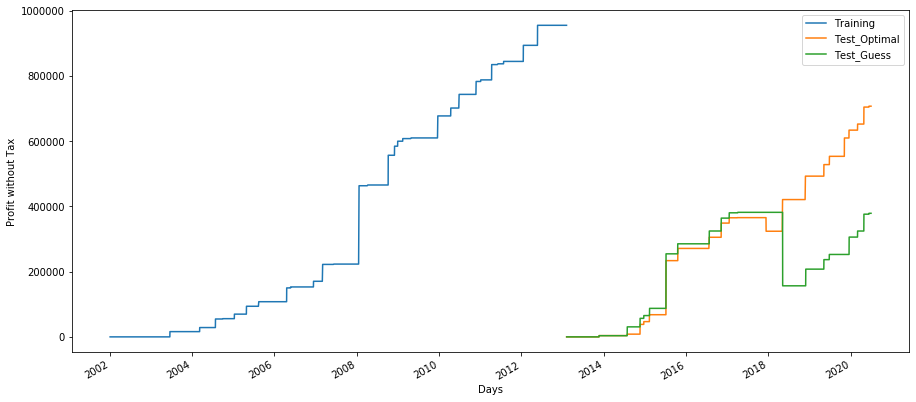

In [72]:
plt.figure(figsize=(15,7))
MA_5_193_data['Money'].plot()
MA_5_177_data['Money'].plot()
MA_5_193_data_test['Money'].plot()
plt.xlabel('Days')
plt.ylabel('Profit without Tax')
plt.legend(['Training', 'Test_Optimal','Test_Guess'])
plt.show()

In [277]:
#train_std=train_daily_return.std(ddof=1)
#test_daily_return=(np.log(test['Amount'])-np.log(test['Amount']).shift(1)).dropna()
#train_daily_return_mean=train_daily_return.mean()
#test_daily_return_mean=test_daily_return.mean()
return_193=(np.log(MA_5_193_data['Money'])-np.log(MA_5_193_data['Money'].shift(1)))
return_193_std=return_193.std(ddof=1)
return_193=return_193.mean()

In [273]:
def sharpe(daily_mean,daily_std):
    ratio=daily_mean/daily_std
    yearly=(252)**0.5*ratio
    return ratio,yearly,print('Daily Sharpe Ratio: {} \nYearly Sharpe Ratio: {} '.format(ratio,yearly))

In [287]:
return_193_test=(np.log(MA_5_193_data_test['Money'])-np.log(MA_5_193_data_test['Money'].shift(1).dropna()))
return_193_test_std=return_193_test.std(ddof=1)
return_193_test=return_193_test.mean()
sharpe(return_193_test,return_193_test_std)

Daily Sharpe Ratio: nan 
Yearly Sharpe Ratio: nan 


(nan, nan, None)

In [291]:
MA_5_193_data_test['Money'].value_counts()

381870.028839    275
0.000000         201
285368.766937    192
3613.774757      170
156573.387396    143
252706.894035    123
207694.667474    109
87434.810327     100
30710.113667      81
324620.776628     75
254627.334206     73
380426.347603     52
305978.969069     49
364138.089743     47
324560.413149     39
65314.711644      34
236847.397791     33
376199.147661     32
56812.187511      22
378945.422337     13
Name: Money, dtype: int64

In [279]:
train['Peak']=train['Amount'].cummax()
train['Drawdown']=(train['Peak']-train['Amount'])/train['Peak']
train['Drawdown'].max()

inf

In [280]:
MA_5_193_data['Peak']=MA_5_193_data['Money'].cummax()
MA_5_193_data['Drawdown']=(MA_5_193_data['Peak']-MA_5_193_data['Money'])/MA_5_193_data['Peak']
MA_5_193_data['Drawdown'].max()

3.392111662116814e-16

In [282]:
MA_5_193_data_test['Peak']=MA_5_193_data_test['Money'].cummax()
MA_5_193_data_test['Drawdown']=(MA_5_193_data_test['Peak']-MA_5_193_data_test['Money'])/MA_5_193_data_test['Peak']
MA_5_193_data_test['Drawdown'].max()

0.5899825187326337

In [283]:
MA_5_177_data['Peak']=MA_5_177_data['Money'].cummax()
MA_5_177_data['Drawdown']=(MA_5_177_data['Peak']-MA_5_177_data['Money'])/MA_5_177_data['Peak']
MA_5_177_data['Drawdown'].max()

0.11397745471760229

In [285]:
MA_5_193_data

,Date,Datezscore,CountS1,CountS2,S1,S2,Money,zscore,Peak,Drawdown
0,2002-01-04,NaN,0,0.000000,11702.150391,7833.200195,0.000000,NaN,0.000000,NaN
1,2002-01-07,NaN,0,0.000000,11892.639648,7870.299805,0.000000,NaN,0.000000,NaN
2,2002-01-08,NaN,0,0.000000,11713.709961,7782.000000,0.000000,NaN,0.000000,NaN
3,2002-01-09,NaN,0,0.000000,11440.719727,7775.799805,0.000000,NaN,0.000000,NaN
4,2002-01-10,NaN,0,0.000000,11256.070312,7722.399902,0.000000,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
2786,2013-01-30,NaN,-72,130.065988,23822.060547,12794.400391,955334.081743,1.636014,955334.081743,0.0
2787,2013-01-31,NaN,-73,131.936635,23729.529297,12685.200195,955334.081743,1.689383,955334.081743,0.0
2788,2013-02-01,NaN,-74,133.794432,23721.839844,12768.799805,955334.081743,1.712431,955334.081743,0.0
2789,2013-02-04,NaN,-75,135.656813,23685.009766,12717.599609,955334.081743,1.727761,955334.081743,0.0
